## Module 2: Fitting the Linear Model

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [1]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm


archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

### Step 1

*   Create a copy of the data and call it `df`
*   Select the `X` variable to be `MedInc` and the `y` be `MedianHouseValue`

Return `X.shape, y.shape` to verify.

In [2]:
# CodeGrade step1
df = pd.concat([california.data, california.target.to_frame()], axis=1)
X = df['MedInc']
y = df['MedHouseVal']

X.shape, y.shape

((20640,), (20640,))

### Step 2

Using `statsmodels`


*   Add the constant term and call it `X_const`
*   fit the OLS model and call it `model`
*   extract the residuals and call them `residuals`
*   count the number of positive and negative residuals, calling them `positive_residuals` and `negative_residuals`, respectively

Return `positive_residuals, negative_residuals` to verify.

In [3]:
# CodeGrade step2
X_const = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid
positive_residuals = residuals[residuals > 0]
negative_residuals = residuals[residuals < 0]

positive_residuals, negative_residuals


(0        0.265112
 3        0.524827
 4        1.453492
 5        0.630941
 6        1.119251
            ...   
 20578    1.289203
 20592    0.093060
 20627    0.089582
 20629    0.011125
 20637    0.052930
 Length: 9662, dtype: float64,
 1       -0.663707
 2       -0.193381
 23      -0.119044
 24      -0.004696
 25      -0.155279
            ...   
 20634   -0.732080
 20635   -0.017571
 20636   -0.537586
 20638   -0.108644
 20639   -0.328500
 Length: 10978, dtype: float64)

### Code

Compute and return $r^2$, calling it `r_squared`.

In [4]:
# CodeGrade step3
r_squared = model.rsquared
r_squared

0.8679984529716042

Plot the residual plot.

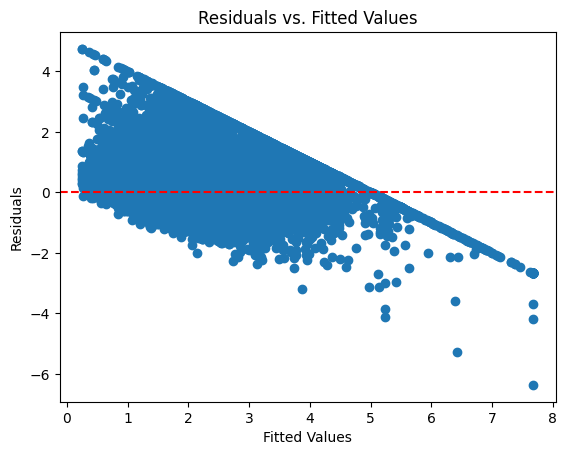

In [5]:
# Residual plot
plt.scatter(model.predict(X), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Step 4

Compute Cook's distance, where the model's `get_influence` is called `influence` and the Cook's distance from this is called `cooks_d`.

Then identify the influential points, calling them `influential_points`. Verify this by returing `influential_points.shape`.

In [6]:
# CodeGrade step4
influence = model.get_influence()
cooks_d_tuple = influence.cooks_distance
cooks_d = cooks_d_tuple[0]
cooks_d, cooks_d
influential_points = np.where(cooks_d > 1)[0]

influential_points.shape

(0,)

Now plot Cook's Distance.

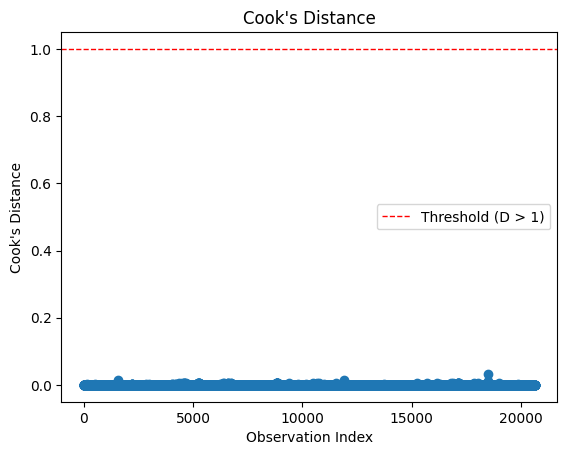

In [7]:
# Plot Cook's Distance
plt.stem(np.arange(len(cooks_d)), cooks_d, basefmt=" ")
plt.axhline(1, color='red', linestyle='--', linewidth=1, label="Threshold (D > 1)")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()